### KNeighborsClassifier
параметры модели:

    n_neighbors — количество  соседей, по умолчанию 5.
    weights{'uniform', 'distance'} — вес объекта в зависимости от удаленности от объекта. Как говорилось ранее, если uniform, то расстояние не будет учитываться в подсчёте вероятности для классификации. По умолчанию оно не учитывается, параметр имеет значение 'uniform'. При 'distance' расстояние учитывается.
    algorithm — алгоритм, используемый при подсчёте расстояния.

    'ball_tree' использует BallTree.
    'kd_tree' использует  KDTree.
    'brute' использует жадный алгоритм.
    'auto' выбирает оптимальный из вышепредставленных.

    leaf_size — параметр для поиска расстояния BallTree или KDTree. По умолчанию равен 30.
    p — значение p-метрики Миньковского. Как мы знаем, — расстояние Манхэттена (L1), — Евклидово расстояние (L2). По умолчанию .
    metric — метрика для оценки расстояний, по умолчанию расстояние Миньковского.
    n_jobs — количество задач, выполняемых параллельно, ограничено количеством ядер вычислительной машины. При n_jobs=-1 использует все.


In [2]:
# пример: 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')
from sklearn.neighbors import KNeighborsClassifier

In [3]:
# Сформируем искусственные данные:
data = pd.DataFrame([[0,0,0],[0.2,0.1,0], [1,0,0], [2,1,1],[2.5,0.9,1], [3,1,1]], columns = ['x','y', 'target'])

In [4]:
# Отделим матрицу признаков и вектор-столбец правильных ответов: 

X = data.drop(['target'],axis = 1)
Y = data['target']

In [5]:
# Обучим kNN с тремя соседями:

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X, Y)

KNeighborsClassifier(n_neighbors=3)

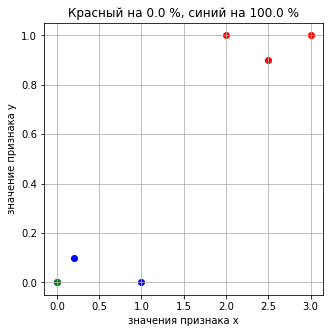

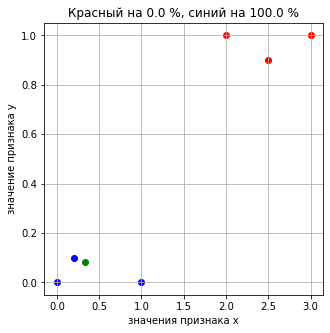

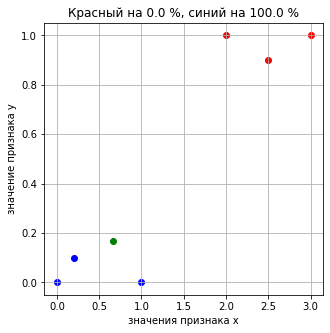

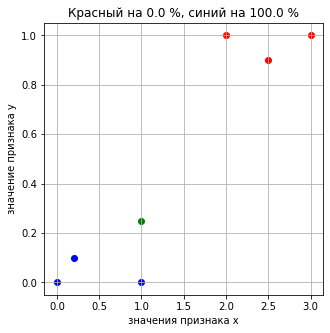

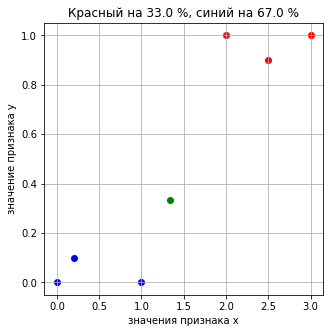

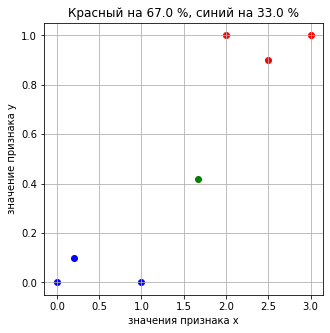

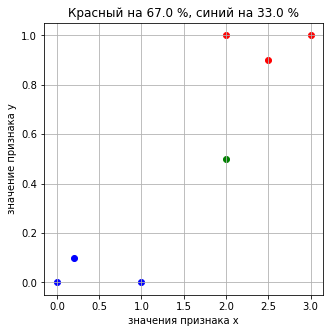

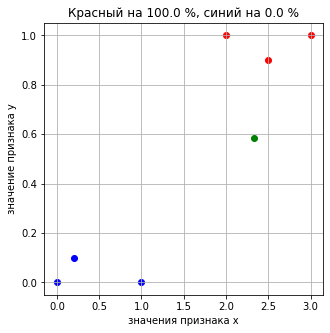

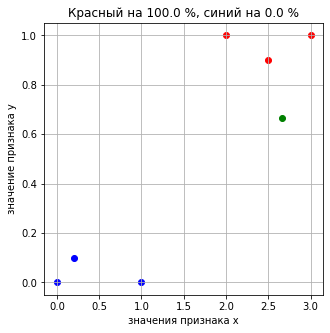

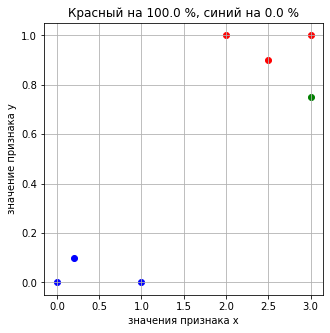

In [6]:
# осмотрим на визуализацию исходных данных и работы модели по классификации точки
for item in np.linspace(0,3,10):
    x = item
    y = item*0.25
    plt.figure(figsize = (5,5))
    red = data[data.target == 1]
    blue = data[data.target == 0]
    red_prob = round(neigh.predict_proba([[x,y]])[0][1],2)*100 #вероятность принадлежности к красным
    blue_prob = round(neigh.predict_proba([[x,y]])[0][0],2)*100 #вероятность принадлежности к синим
    plt.title(f'Красный на {red_prob} %, синий на {blue_prob} %')
    plt.xlabel('значения признака x')
    plt.ylabel('значение признака y')
    plt.scatter(red.x.values,red.y.values ,c= 'r')
    plt.scatter(blue.x.values,blue.y.values ,c= 'b')
    plt.scatter(x,y ,c= 'g')
    plt.grid()
    plt.show()

Как можно видеть, когда зеленая точка «улетает» из кластера синих точек, вероятность падает, при этом вероятность принадлежности к классу в данном случае может принимать всего четыре значения (0, 0.33, 0.66, 1) в зависимости от количества соседей, так как не учтено расстояние при подсчёте вероятности. 

In [7]:
# Попробуем учесть расстояние. Для этого в модель подадим параметр weights='distance'.
# В коде выше изменим объект модели:

neigh = KNeighborsClassifier(n_neighbors=3, weights='distance')
neigh.fit(X, Y)

KNeighborsClassifier(n_neighbors=3, weights='distance')

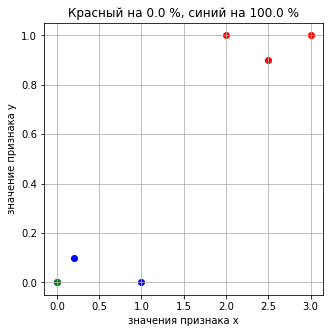

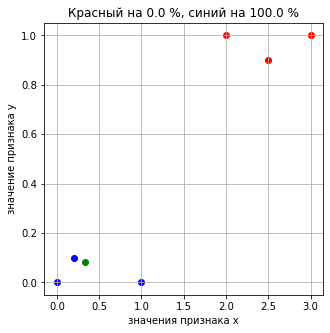

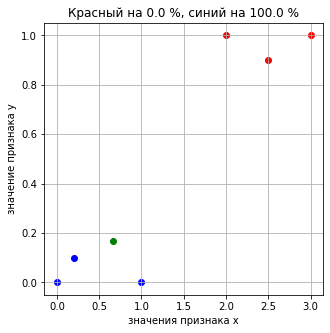

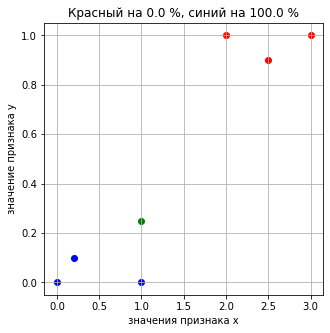

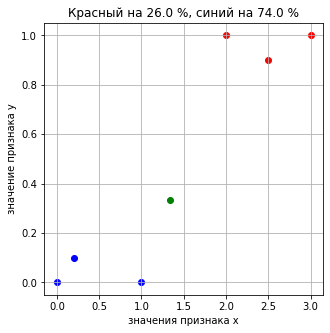

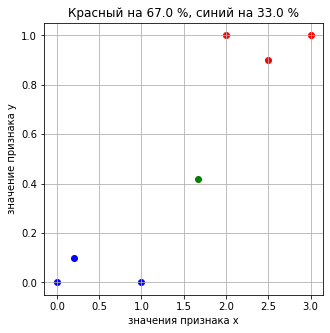

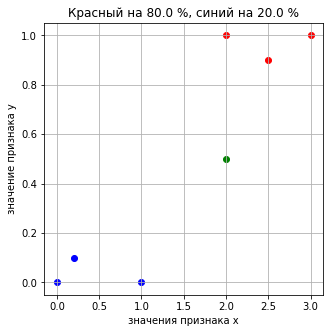

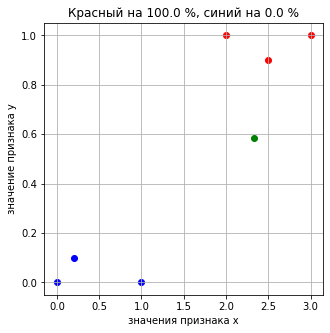

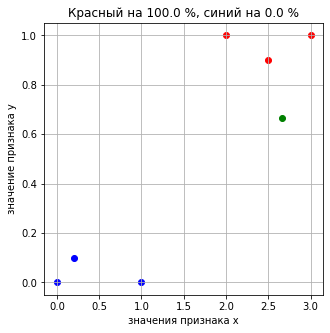

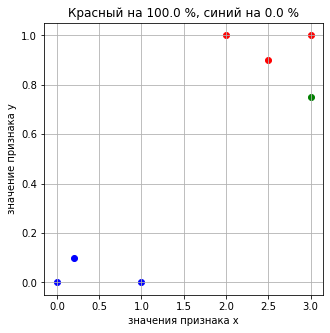

In [8]:
# И выполним код заново
for item in np.linspace(0,3,10):
    x = item
    y = item*0.25
    plt.figure(figsize = (5,5))
    red = data[data.target == 1]
    blue = data[data.target == 0]
    red_prob = round(neigh.predict_proba([[x,y]])[0][1],2)*100 #вероятность принадлежности к красным
    blue_prob = round(neigh.predict_proba([[x,y]])[0][0],2)*100 #вероятность принадлежности к синим
    plt.title(f'Красный на {red_prob} %, синий на {blue_prob} %')
    plt.xlabel('значения признака x')
    plt.ylabel('значение признака y')
    plt.scatter(red.x.values,red.y.values ,c= 'r')
    plt.scatter(blue.x.values,blue.y.values ,c= 'b')
    plt.scatter(x,y ,c= 'g')
    plt.grid()
    plt.show()

### Снижение размерности
Основным методом снижения размерности в задачах кластеризации является PCA (principal component analysis, метод главных компонент)